# SingDop

In [37]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr

In [38]:
filename = r"Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"

In [ ]:
basedata = radar_io(filename) 

In [24]:
sradar = basedata.ToPyartRadar()

In [27]:
#radar = pyart.io.read(fc1[0])
print(sradar.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width'])


In [28]:
import singledop
sd_test = singledop.SingleDoppler2D(L=30.0, radar=sradar, range_limits=[0, 100],
                                    sweep_number=0, name_vr='velocity',
                                    thin_factor=[4, 12])

2909 total observations (M)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


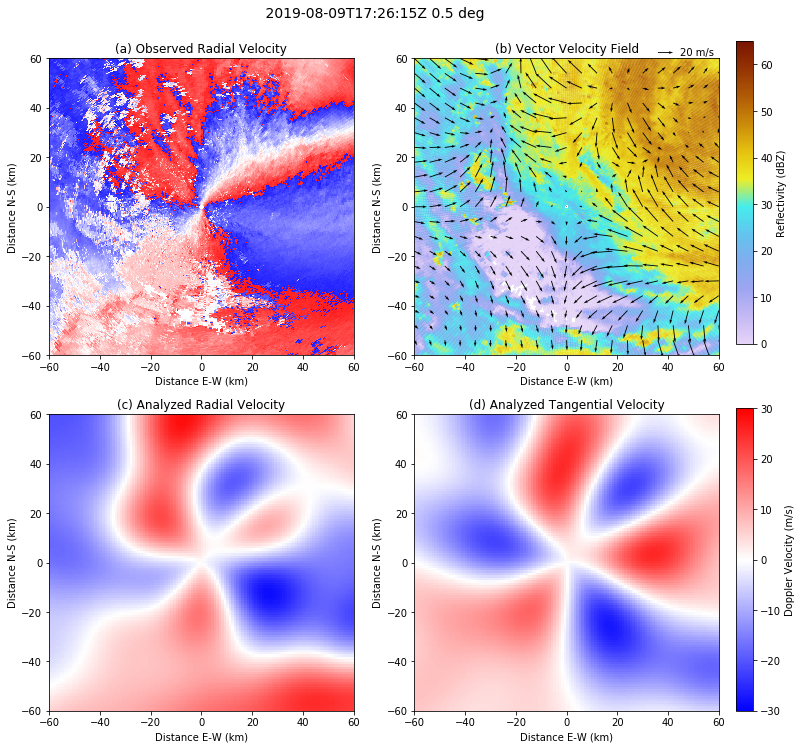

In [29]:
display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=400, legend=20, return_flag=False, thin=6,
                        levels=-30.0+2.0*np.arange(31))

In [35]:


sd_test = singledop.SingleDoppler2D(L=30.0, radar=sradar, range_limits=[0, 230],
                                    sweep_number=0, name_vr='velocity',
                                    thin_factor=[4, 12], filter_data=True,
                                    filter_distance=5)



6085 total observations (M)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


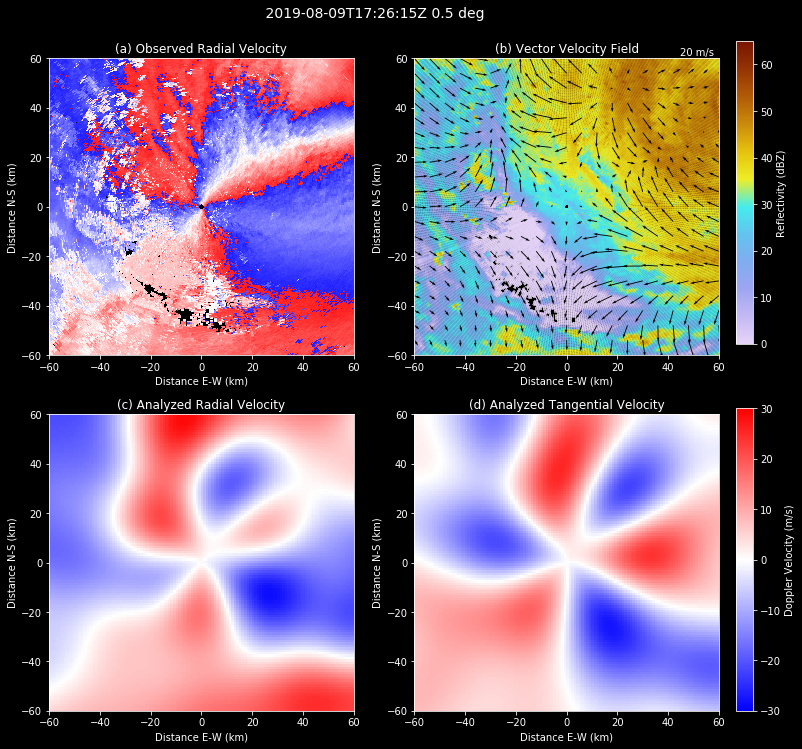

In [36]:


display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=400, legend=20, return_flag=False, thin=6,
                        levels=-30.0+2.0*np.arange(31), name_vr='velocity', name_dz='reflectivity')



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


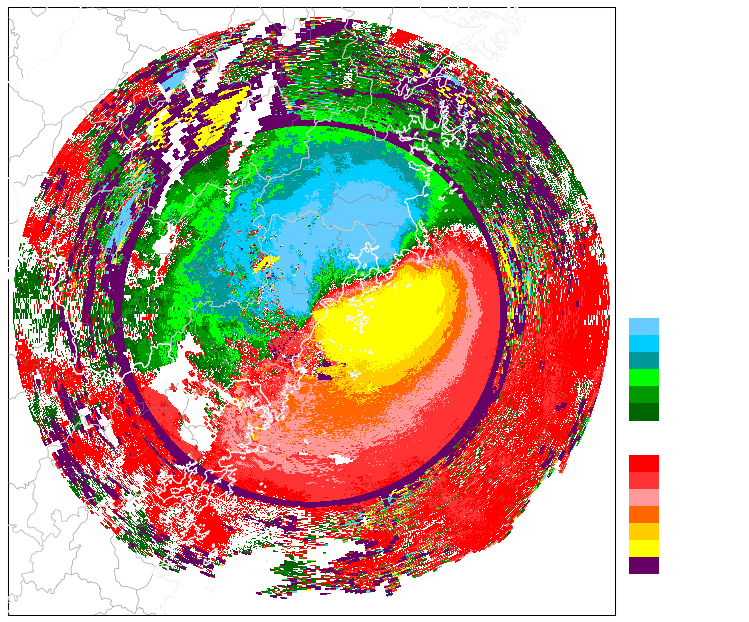

In [33]:
import cinrad
%matplotlib inline
f = cinrad.io.CinradReader('Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2')

v = f.get_data(1, 230, 'VEL')
v_corrected = cinrad.correct.dealias(v)

fig = cinrad.visualize.PPI(v_corrected, dpi=75)

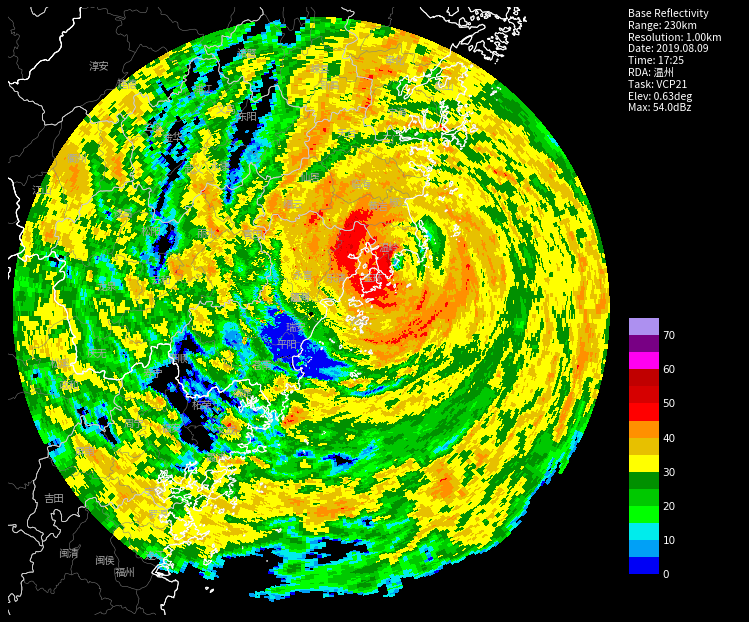

In [34]:
tilt_number = 0
data_radius = 230
data_dtype = 'REF' # stands for reflectivity
r = f.get_data(tilt_number, data_radius, data_dtype)
fig = cinrad.visualize.PPI(r, dpi=75, add_city_names=True)